# Nemhauser Ullman Algorithm

This is an implementation of Nemhauser Ullman algorithm for the knapsack problem. 

This was done as a part of Lecture "Randomized Algorithms and Probabilistic Analysis" 

by Prof. Heiko Röglin at University of Bonn (http://www.roeglin.org/)

# What is a knapsack problem?
### Informally:
A burglar breaks into an appartment and wants to fill the bag (knapsack) to full, but also to gain maximum profit


### Formally: 

Given: 

- $n$ items, with weights $w$ and profits $p$. 
- knapsack capacity $W$

Find:

- $w_1 x_1 + ... + w_n x_n \leq W$

Maximize:

- $p_1 x_1 + ... + p_n x_n$
 


# Exploring an example

In [473]:
# declare items
names = ['mouse', 'laptop', 'keyboard', 'book', 'pencil', 'cellphone']
weights = [5, 15, 7, 9, 2, 5]
profits = [10, 70, 25, 20, 2, 50]
capacity = 37
number_of_items = len(weights)

In [474]:
print("Total weight is {}".format(sum(weights)))
print("Total profit is {}".format(sum(profits)))

Total weight is 43
Total profit is 177


In [475]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot items

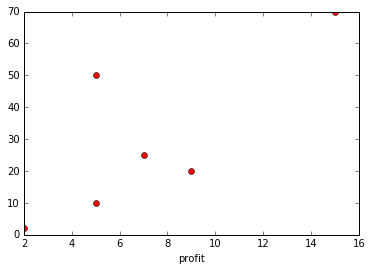

In [476]:
plt.plot(weights, profits, 'ro', label='')
plt.xlabel('weight')
plt.xlabel('profit')
plt.show()

# Plot profit to weight ratio 

In [477]:
from __future__ import division
profit_weight_relation = sorted([round(w/p, 3) for w, p in zip(weights, profits)])

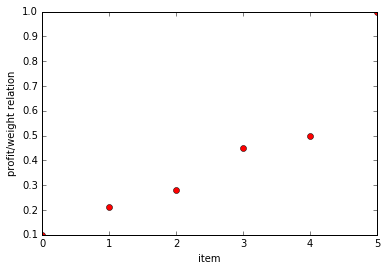

In [478]:
plt.plot(profit_weight_relation, 'ro', label='')
plt.ylabel('profit/weight relation')
plt.xlabel('item')
plt.show()

# Attempt to solve

### Let's look at every possible combination of items

For every item from 1 to n, generate a string $\{0,1\}^n$, 
where 0 means we don't pick an item, and 1 means we pick it

In [479]:
import itertools
zero_one_vectors = list(itertools.product([0, 1], repeat=number_of_items))

In [480]:
possible_solutions = list()
for vector in zero_one_vectors:
    p = sum([a * b for a, b in zip(vector, profits)])
    w = sum([a * b for a, b in zip(vector, weights)])
    possible_solutions.append(tuple((w, p)))

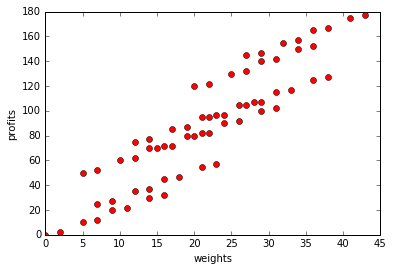

In [481]:
p, w = zip(*possible_solutions)
plt.plot(p, w, 'ro', label='')
plt.xlabel('weights')
plt.ylabel('profits')
plt.show()

# Nemhauser Ullmann algorithm

The core idea of Nemhauser Ullmann algorithm is to utilize definition of pareto optimal sets.

In order to understand this, let us first plot pareto solutions and then see which ones are pareto optimal.

### Algorithm:

Initialize set $P_{i-1}$ as $[(0,0)]$

For next item $i$ generate set $P_{i-1}^{+i} = \{ (w + weight(i), p + profit(i)) \, | \, \forall (w, p) \in P_{i-1} \}$

Declare $Q_i = P_{i-1} \cup P_{i-1}^{+i}$

Declare $P_i = \{ x | \nexists y \in Q_i \,y \,dominates \,x \}$

### Intuition
To get intuation how algorithm works, let's plot 
- $P_{i-1}$ 
- $P_{i-1}^{+i}$ 

Then later we will try to calculate set $P_i$ which removes dominated solutions. But for now we keep them.

In [482]:
import copy

resultP = []
resultPi = []
P_plus_item = []
P = [(0,0)]
resultP.append(P) # add solution (0,0)

for item in range(number_of_items):
    P_plus_item = copy.deepcopy(P)
    for i, point in enumerate(P_plus_item):
        weight, profit = point
        P_plus_item[i] = tuple((weight + weights[item], profit + profits[item]))
    P = P + P_plus_item
    resultP.append(P)
    resultPi.append(P_plus_item)

resultP = [sorted(i) for i in resultP]
resultPi = [sorted(i) for i in resultPi]

### Plot

We are going to plot $Q$, specifically sets $P_{i-1}$ and $P_{i-1}^{+i}$

- Red circles represent set $P_{i-1}$
- Green triangle represent set $P_{i-1}^{+i}$ i.e. what would happen to $P_{i-1}$ if we add item $i$ to it

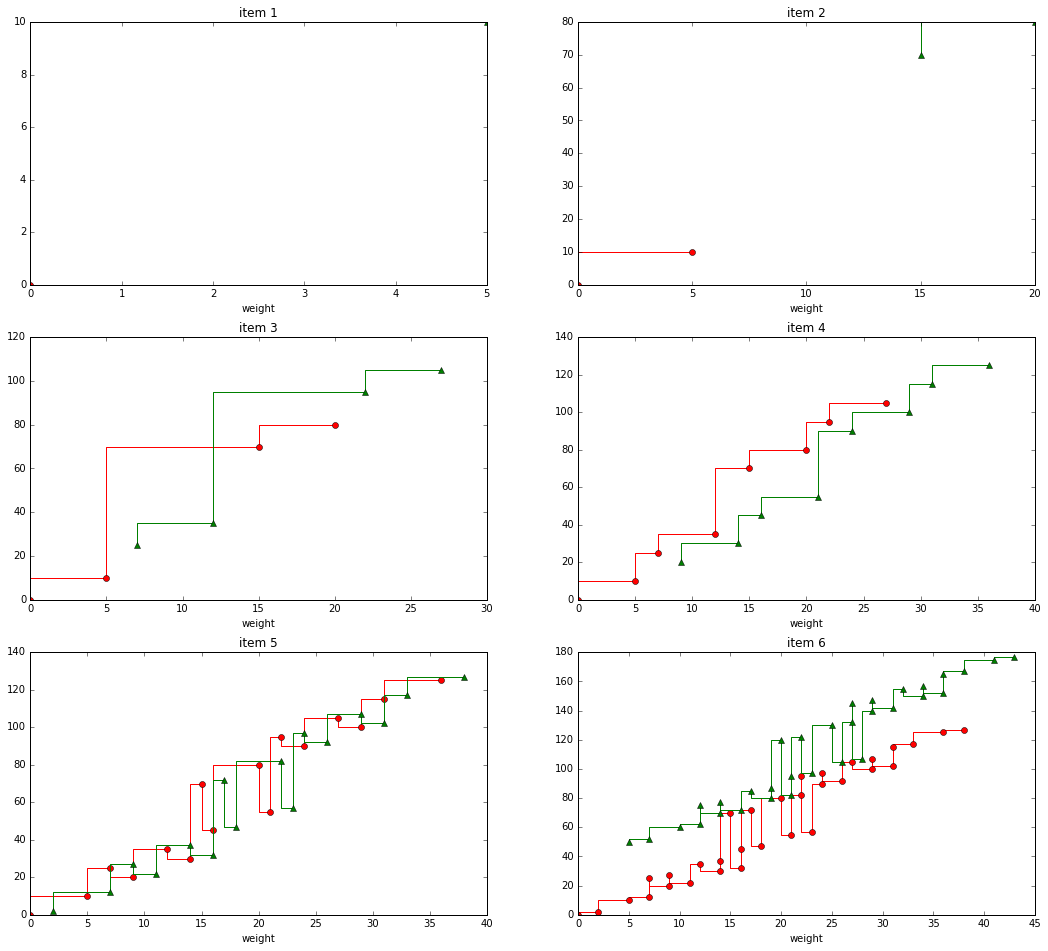

In [483]:
dim = {'x': 3, 'y': 2}
f, axarr = plt.subplots(dim['x'], dim['y'], figsize=(18, 16))

results_number = -1
for i in range(dim['x']):
    for j in range(dim['y']):
        results_number += 1
        if results_number < len(resultP):
            x, y = zip(*resultP[results_number])
            axarr[i, j].step(x,y, 'ro')
            x, y = zip(*resultPi[results_number])
            axarr[i, j].step(x,y, 'g^')
            axarr[i, j].set_title('item ' + str(results_number + 1))
            axarr[i, j].set_xlabel('profit')
            axarr[i, j].set_xlabel('weight')

plt.show()
f.subplots_adjust(hspace=0.5)

# Pareto optimal

Now we have to understand what it means for a solution to be pareto optimal.

Defintion: a solution $y$ is called *dominated* if $\exists$ solution $x$ for which 

- $wx \leq wy$
- $px \geq py$

And at least one of these inequalities is strict

Definition: a solution x is called *pareto optimal* if it is not dominated by any other solution

In [484]:
def find_pareto_optimal_solutions(feasible_solutions):
    """
    given a list of feasible solutions
    return a list of pareto optimal solutions
    """
    assert isinstance(feasible_solutions, list)
    pareto_optimal = list()
    pareto_optimal.append(feasible_solutions[0])
    
    _, max_profit = feasible_solutions[0]
    for sol in feasible_solutions[1:]:
        weight, profit = sol
        if profit > max_profit:
            max_profit = profit
            if pareto_optimal[-1][0] == weight: # weight of last element added
                del pareto_optimal[-1]
            pareto_optimal.append(sol)
    return pareto_optimal

In [485]:
# test cases
import unittest
tc = unittest.TestCase('__init__')

# notation: (weight, profit)
lead = [(0,0)]
gold = [(0,0)]
tc.assertEqual(find_pareto_optimal_solutions(lead), gold)

lead = [(0, 0), (5, 10)]
gold = [(0, 0), (5, 10)]
tc.assertEqual(find_pareto_optimal_solutions(lead), gold)

lead = [(15, 70), (16, 45), (17, 72)]
gold = [(15, 70), (17, 72)]
tc.assertEqual(find_pareto_optimal_solutions(lead), gold)

lead = [(5, 50), (7, 25), (7, 52), (9, 27)]
gold = [(5, 50), (7, 52)]
tc.assertEqual(find_pareto_optimal_solutions(lead), gold)

lead = [(5, 10), (7, 12), (7, 25)]
gold = [(5, 10), (7, 25)]
tc.assertEqual(find_pareto_optimal_solutions(lead), gold)

### Plotting pareto optimal solutions
1. Given 2 *sorted* lists $P_{i-1}$ and $P_{i-1}^{+i}$ 
2. Merge them together preserving the order $Q_i = P_{i-1} \cup P_{i-1}^{+i}$ 
3. Find pareto optimal solutions in $Q_i$

In [486]:
import heapq

pareto_optimal_points = list()
for p, pi in zip(resultP, resultPi):
    m = list(heapq.merge(p, pi))
    s = find_pareto_optimal_solutions(m)
    pareto_optimal_points.append(s)

### Now we can plot pareto optimal solutions

dotted blue line repsenets solutions that were selected as pareto optimal

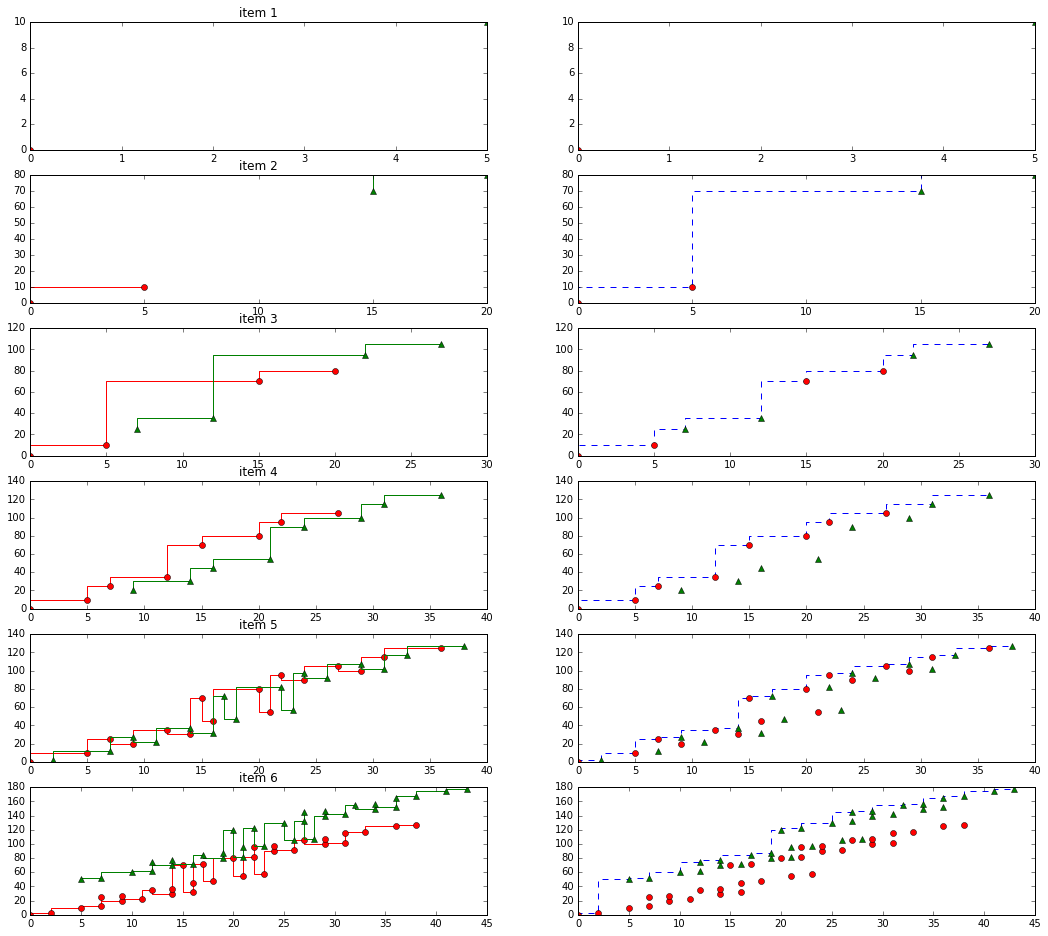

In [487]:
dim = {'x': 6, 'y': 2}
f, axarr = plt.subplots(dim['x'], dim['y'], figsize=(18, 16))


for i in range(dim['x']):
    
    x, y = zip(*pareto_optimal_points[i])
    axarr[i, 1].plot(x,y, ls='steps--', ms=14)
    
    x, y = zip(*resultP[i])
    axarr[i, 0].step(x,y, 'ro')
    axarr[i, 1].plot(x,y, 'ro')
    
    x, y = zip(*resultPi[i])
    axarr[i, 0].step(x,y, 'g^')
    axarr[i, 1].plot(x,y, 'g^')
    
    
    axarr[i, 0].set_title('item ' + str(i + 1))

plt.show()
f.subplots_adjust(hspace=15)

# Attempt to combine algorithm

In [488]:
import copy
import heapq

def calculate_p_plus_item(p):
    assert isinstance(p, list)
    p_plus_item = copy.deepcopy(p)
    for i, point in enumerate(p_plus_item):
        weight, profit = point
        x = weight + weights[item]
        y = profit + profits[item]
        p_plus_item.append(tuple((x, y)))
        p_plus_item = sorted(p_plus_item)
    return p_plus_item

def best_capacity_result(p, capacity):
    """
    given all pareto optimal solutions
    pick the best which fills knapsack to capacity
    """
    assert isinstance(p, list)
    return [(w1, p1) for (w1, p1) in p if w1 <= capacity][-1]


p = [(0,0)]
for item in range(number_of_items):
    p_plus_item = calculate_p_plus_item(p)
    q = list(heapq.merge(p, p_plus_item))
    p = find_pareto_optimal_solutions(q)
solution = best_capacity_result(p, capacity)


In [489]:
solution

(37, 192)

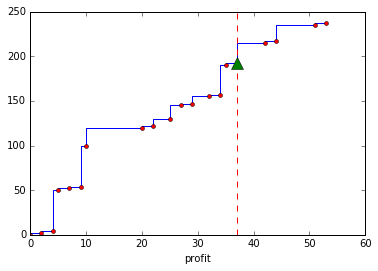

In [490]:
x, y = zip(*all_pareto_optimal_solutions)
plt.step(x, y)
plt.plot(x, y, 'ro', ms=4)

x, y = solution
plt.axvline(x, linestyle = '--', color='red')
plt.plot(x, y, 'g^', ms=12)

plt.xlabel('weight')
plt.xlabel('profit')

# Full Algorithm

In [491]:
import copy
import heapq

def calculate_p_plus_item(p):
    assert isinstance(p, list)
    p_plus_item = copy.deepcopy(p)
    for i, point in enumerate(p_plus_item):
        weight, profit = point
        x = weight + weights[item]
        y = profit + profits[item]
        p_plus_item.append(tuple((x, y)))
        p_plus_item = sorted(p_plus_item)
    return p_plus_item

def best_capacity_result(p, capacity):
    """
    given all pareto optimal solutions
    pick the best which fills knapsack to capacity
    """
    assert isinstance(p, list)
    return [(w1, p1) for (w1, p1) in p if w1 <= capacity][-1]

def find_pareto_optimal_solutions(feasible_solutions):
    """
    given a list of feasible solutions
    return a list of pareto optimal solutions
    """
    assert isinstance(feasible_solutions, list)
    pareto_optimal = list()
    pareto_optimal.append(feasible_solutions[0])
    
    _, max_profit = feasible_solutions[0]
    for sol in feasible_solutions[1:]:
        weight, profit = sol
        if profit > max_profit:
            max_profit = profit
            if pareto_optimal[-1][0] == weight: # weight of last element added
                del pareto_optimal[-1]
            pareto_optimal.append(sol)
    return pareto_optimal

def nemhauser_ullman(weights, profits, capacity):
    assert isinstance(weights, list)
    assert isinstance(profits, list)
    assert isinstance(capacity, int)
    
    p = [(0,0)]
    for item in range(number_of_items):
        p_plus_item = calculate_p_plus_item(p)
        q = list(heapq.merge(p, p_plus_item))
        p = find_pareto_optimal_solutions(q)
    return best_capacity_result(p, capacity)